© 2018 Suzy Beeler and Griffin Chure. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT) 

This exercise was generated from a Jupyter notebook. You can download the notebook [here](genetic_drift.ipynb).
___

# Objective 

Here we will discuss the Wright-Fisher model of genetic drift using two approaches: firstly through the analytical definition of the allele frequency over time and secondly through a computational simulation. This tutorial illustrates the role that genetic drift plays in evolution **in the absence of selection** as well as the value of computing results in multiple ways.

# Buri experiment



In [1]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt

# For pretty plots
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
sns.set(rc=rc)

In [10]:
# number of vials in the Buri experiment 
n_vials = 107

# number of flies in each vial
n_flies = 16

# number of generations to run simulation
n_generations = 20

# array to store allele frequencies
red_freq = np.zeros([n_vials, n_generations])

# initialize all vials to have allele freq 0.5 at generation 0
red_freq[:,0] = 0.5

In [11]:
# loop through number of vials
for v in range(n_vials):
    
    # loop  through number of generations
    for g in range(1,n_generations):
        
        # determine allele frequency of red in previous generation
        old_red_freq = red_freq[v,g-1]
        
        # simulate mating for the next generation
        new_alleles = np.random.choice([0,1], size=n_flies*2, 
                                       p=[1-old_red_freq, old_red_freq])
        
        # calculate new red allele frequence
        new_red_freq = sum(new_alleles) / len(new_alleles)
        
        # update frequency array 
        red_freq[v,g] = new_red_freq

Text(0,0.5,'frequency')

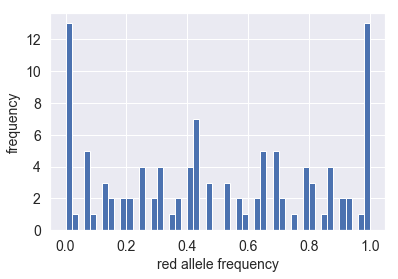

In [12]:
# plot the histogram of the allele frequency at the last generation
plt.hist(red_freq[:,-1], bins=50);
plt.xlabel("red allele frequency")
plt.ylabel("frequency")

Text(0,0.5,'red allele frequency')

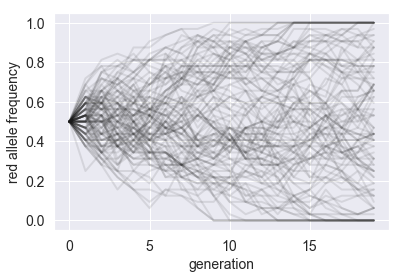

In [13]:
for v in range(n_vials):
    plt.plot(red_freq[v,:], alpha=0.1, color='k')
plt.xlabel("generation")
plt.ylabel("red allele frequency")